Breast Cancer Classification using Neural Network

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data collection and processing

In [5]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [6]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [7]:
df=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)

In [8]:
df.head()
df.shape
df['label']=breast_cancer_dataset.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1-> benign
0->malignant

In [11]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating features and targets

In [13]:
x=df.drop('label',axis=1)
y=df['label']


In [16]:
x
y


0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

Splitting into test and train data


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape,x_test.shape)

(455, 30) (114, 30)


In [43]:
#To standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

Building neural network

In [44]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [45]:
#setting up layers
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

In [46]:
#compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
          )

In [47]:
#training the model
history=model.fit(x_train,y_train,validation_split=0.1,epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 17ms/step - loss: 1.1597 - accuracy: 0.3814 - val_loss: 0.8064 - val_accuracy: 0.4783
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.8591 - accuracy: 0.4645 - val_loss: 0.5869 - val_accuracy: 0.6087
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6228 - accuracy: 0.6430 - val_loss: 0.4255 - val_accuracy: 0.8261
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.4565 - accuracy: 0.7971 - val_loss: 0.3175 - val_accuracy: 0.9130
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.3419 - accuracy: 0.8875 - val_loss: 0.2494 - val_accuracy: 0.9565
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 0.2712 - accuracy: 0.9193 - val_loss: 0.2058 - val_accuracy: 0.9783
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.9291 - val_loss: 0.1768 - val_accuracy: 0.9783
Epoch 8/20
13/13 [=

Visualize accuracy and loss

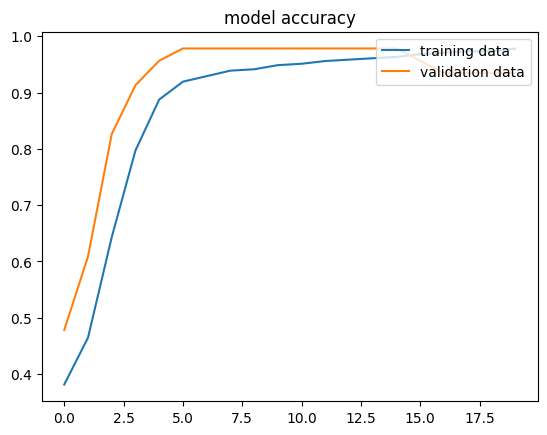

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['training data','validation data'], loc='upper right')

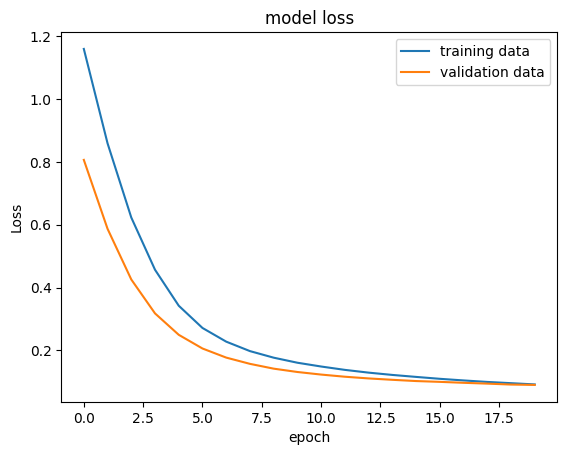

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data','validation data'], loc='upper right')

Accuracy of model on Test data

In [53]:
loss,accuracy=model.evaluate(x_test_std,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1170 - accuracy: 0.9561


In [54]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [55]:
#To build a predictive system
y_pred=model.predict(x_test_std)


4/4 [==============================] - 0s 3ms/step


In [56]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.20092373 0.73391455]


In [57]:
print(x_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [58]:
print(y_pred)

[[2.00923726e-01 7.33914554e-01]
 [4.32277411e-01 5.72544873e-01]
 [1.07741982e-01 9.80459809e-01]
 [9.99971151e-01 2.00310533e-05]
 [2.83589572e-01 4.02044207e-01]
 [9.98826921e-01 1.16953312e-03]
 [4.58652020e-01 8.19730997e-01]
 [5.00860512e-02 9.19986188e-01]
 [1.07975781e-01 8.76902223e-01]
 [3.84777449e-02 8.02294552e-01]
 [4.43183959e-01 5.60321331e-01]
 [3.31575900e-01 8.63514900e-01]
 [2.15211019e-01 8.08569193e-01]
 [3.28122169e-01 8.25001419e-01]
 [7.20904768e-02 8.96782756e-01]
 [9.79236841e-01 6.02153279e-02]
 [9.77843255e-02 9.48973954e-01]
 [1.40786916e-01 9.80008364e-01]
 [4.25353199e-02 8.41385067e-01]
 [9.78894830e-01 1.26232672e-02]
 [4.62021291e-01 9.83076453e-01]
 [1.61192417e-01 9.65784252e-01]
 [1.65282547e-01 9.40751553e-01]
 [3.33619341e-02 9.22228277e-01]
 [1.05500497e-01 5.78296006e-01]
 [9.64758277e-01 2.87897903e-02]
 [2.86509663e-01 8.93031955e-01]
 [3.23508620e-01 4.66421932e-01]
 [9.77020502e-01 7.01875612e-02]
 [9.77036536e-01 3.16516422e-02]
 [6.615576

model.predict gives me prediction probablity of that datapoint

In [59]:
#converting prediction probablity to class labels
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


Building predicitive system

In [62]:
input_data=(17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189)
#change to array
input_data_to_array=np.asarray(input_data)
#reshape the numpy array
input_data_reshaped=input_data_to_array.reshape(1,-1)
#standardizing input data
std_data=scaler.transform(input_data_reshaped)

prediction=model.predict(std_data)
print(prediction)
prediction_label=np.argmax(prediction)
print(prediction_label)
if(prediction_label==0):
  print('Tumor: Malignant')
else:
  print("Tumor:Benign")

1/1 [==============================] - 0s 38ms/step
[[1. 0.]]
0
Tumor: Malignant
